In [1]:
import cv2
import os
from random import shuffle
from tqdm import tqdm
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from random import randrange
from datetime import datetime

In [3]:
def generate_dataset():
    face_classifier = cv2.CascadeClassifier("haarcascade_frontalface_default.xml")
    def face_cropped(img):
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        faces = face_classifier.detectMultiScale(gray, 1.3, 5)
        
        if faces is ():
            return None
        for (x,y,w,h) in faces:
            cropped_face = img[y:y+h,x:x+w]
        return cropped_face
    
    cap = cv2.VideoCapture(0)
    img_id = 0
    
    while True:
        ret, frame = cap.read()
        if face_cropped(frame) is not None:
            img_id+=1
            face = cv2.resize(face_cropped(frame), (200,200))
            face = cv2.cvtColor(face, cv2.COLOR_BGR2GRAY)
            file_name_path = "newdata/"+"unknown."+str(img_id)+".jpg"
            cv2.imwrite(file_name_path, face)
            cv2.putText(face, str(img_id), (50,50), cv2.FONT_HERSHEY_COMPLEX, 1, (0,255,0), 2 )
            
            cv2.imshow("Cropped_Face", face)
            if cv2.waitKey(1)==13 or int(img_id)==100:
                break
                
    cap.release()
    cv2.destroyAllWindows()
    print("collection complete")
    
    



<>:7: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:7: SyntaxWarning: "is" with a literal. Did you mean "=="?
<ipython-input-3-6a4dee948a00>:7: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if faces is ():


In [5]:
generate_dataset()

collection complete


In [38]:
def my_label(image_name):
    name = image_name.split('.')[-3] 
 
    if name=="rehman":
        return 0
    elif name=="harris":
        return 1
    else:
        return 2


def my_data():
    data = []
    for img in tqdm(os.listdir("newdata")):
        path=os.path.join("newdata",img)
        img_data = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
        img_data = cv2.resize(img_data, (50,50))
        data.append([np.array(img_data), my_label(img)])
    shuffle(data)  
    return data


In [39]:
data = my_data()

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 299/299 [00:00<00:00, 3068.70it/s]


In [40]:
X = np.array([i[0] for i in data])
y = np.array([i[1] for i in data])
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)
X_train = np.asarray(X_train).reshape(-1,50,50,1)
y_train = np.asarray(y_train)
X_test = np.asarray(X_test).reshape(-1,50,50,1)
y_test = np.asarray(y_test)

In [41]:
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3), activation ='relu',input_shape=(50,50,1)),
                                   tf.keras.layers.MaxPool2D(2,2),
                                   tf.keras.layers.Conv2D(32,(3,3),activation ='relu'),
                                   tf.keras.layers.MaxPool2D(2,2),
                                   tf.keras.layers.Conv2D(64,(3,3),activation ='relu'),
                                   tf.keras.layers.MaxPool2D(2,2),
                                   tf.keras.layers.Flatten(),
                                   tf.keras.layers.Dense(512,activation ='relu'),
                                   tf.keras.layers.Dense(3,activation='softmax')
                                   ])
model.compile(loss ='sparse_categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])


In [42]:
model_fit = model.fit(X_train, y_train, epochs = 12 ,validation_data = (X_test, y_test))

Epoch 1/12
8/8 [==============================] - 1s 44ms/step - loss: 20.3248 - accuracy: 0.3682 - val_loss: 4.1567 - val_accuracy: 0.3167
Epoch 2/12
8/8 [==============================] - 0s 28ms/step - loss: 1.4327 - accuracy: 0.4812 - val_loss: 0.5217 - val_accuracy: 0.7000
Epoch 3/12
8/8 [==============================] - 0s 28ms/step - loss: 0.3494 - accuracy: 0.9540 - val_loss: 0.1243 - val_accuracy: 1.0000
Epoch 4/12
8/8 [==============================] - 0s 29ms/step - loss: 0.0599 - accuracy: 1.0000 - val_loss: 0.0158 - val_accuracy: 1.0000
Epoch 5/12
8/8 [==============================] - 0s 30ms/step - loss: 0.0081 - accuracy: 1.0000 - val_loss: 0.0259 - val_accuracy: 1.0000
Epoch 6/12
8/8 [==============================] - 0s 30ms/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 0.0015 - val_accuracy: 1.0000
Epoch 7/12
8/8 [==============================] - 0s 28ms/step - loss: 6.2750e-04 - accuracy: 1.0000 - val_loss: 7.4546e-04 - val_accuracy: 1.0000
Epoch 8/12
8/8 [==

In [43]:
first = model.predict(X_test)
loss, acc = model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 7ms/step - loss: 3.0485e-04 - accuracy: 1.0000


In [14]:
def markAttendence(name):
    with open('attendence.csv','r+') as f:
        myDataList = f.readlines()
        nameList = []
        for line in myDataList:
            entry = line.split(',')
            nameList.append(entry[0])
        if name not in nameList:
            now = datetime.now()
            dtString = now.strftime('%H:%M:%S')
            f.writelines(f'\n{name},{dtString}')

In [45]:

face_classifier = cv2.CascadeClassifier("haarcascade_frontalface_default.xml")
def face_cropped(img):
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        faces = face_classifier.detectMultiScale(gray, 1.3, 5)
        
        if faces is ():
            return None
        for (x,y,w,h) in faces:
            cropped_face = img[y:y+h,x:x+w]
        return cropped_face
    
cap = cv2.VideoCapture(0)

ret, frame = cap.read()
if face_cropped(frame) is not None:
    face = cv2.resize(face_cropped(frame), (200,200))
    face = cv2.cvtColor(face, cv2.COLOR_BGR2GRAY)
    img_data = cv2.resize(face, (50,50))
    Tdata = np.array(img_data).reshape(-1, 50, 50, 1)
    u = model.predict([Tdata])
    print(u)
    if np.argmax(u) == 0 :
        name='rahman'
    elif np.argmax(u)== 1 :
        name='harris'
    else:
        name='anas'
    markAttendence(name)
   
                
    cap.release()
    cv2.destroyAllWindows()
    print("collection complete")

<>:6: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:6: SyntaxWarning: "is" with a literal. Did you mean "=="?
<ipython-input-45-28a7ec8d1e6a>:6: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if faces is ():


[[9.9995375e-01 6.9545206e-07 4.5560868e-05]]
collection complete


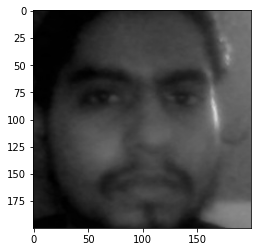

this is harris


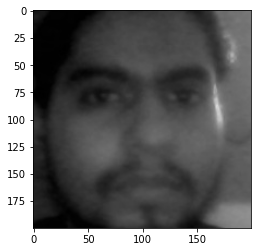

this is harris


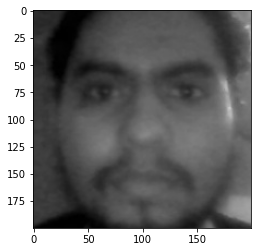

this is harris


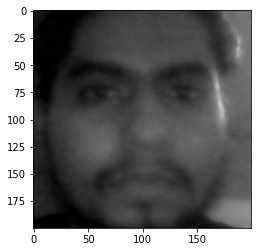

this is harris


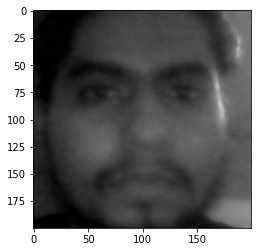

this is harris


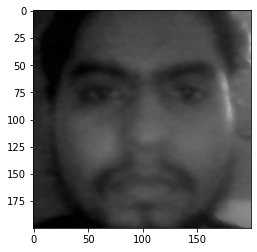

this is harris


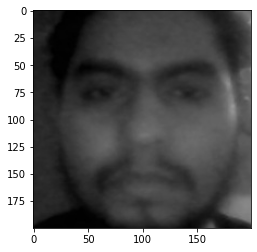

this is harris


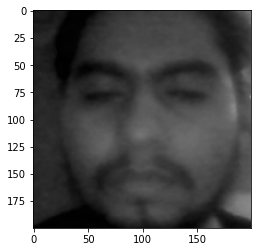

this is harris


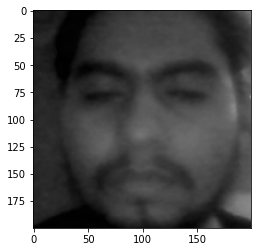

this is harris


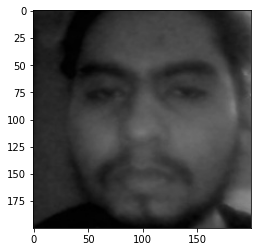

this is harris


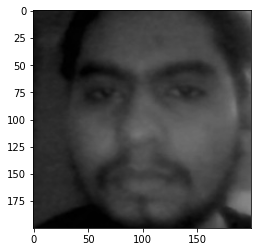

this is harris


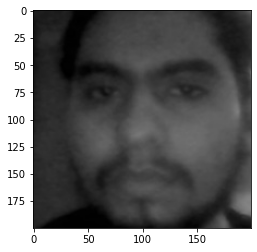

this is harris


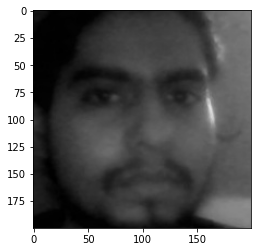

this is harris


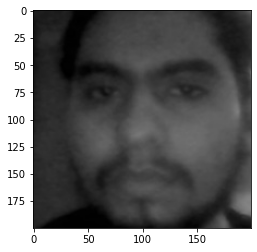

this is harris


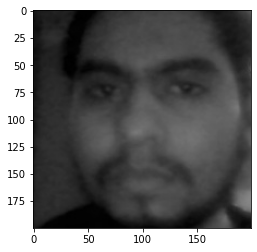

this is harris


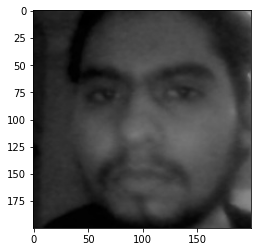

this is harris


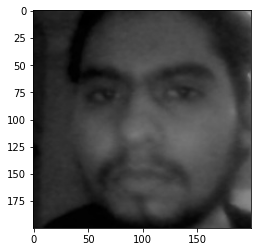

this is harris


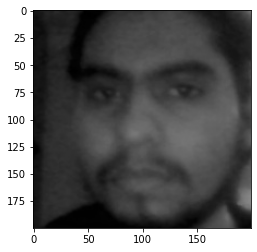

this is harris


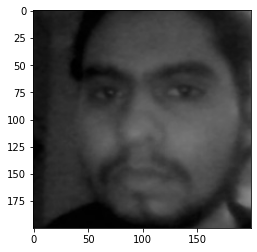

this is harris


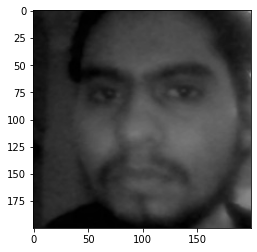

this is harris


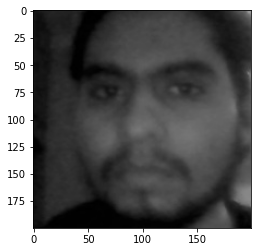

this is harris


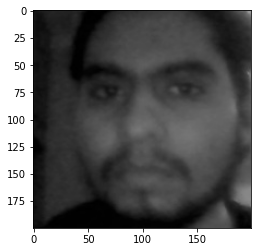

this is harris


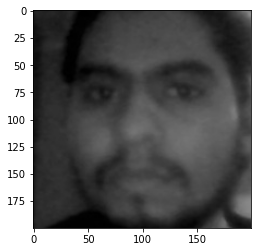

this is harris


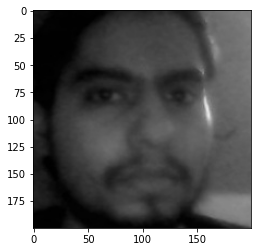

this is harris


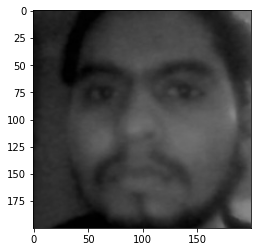

this is harris


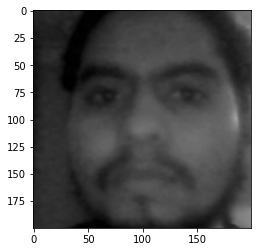

this is harris


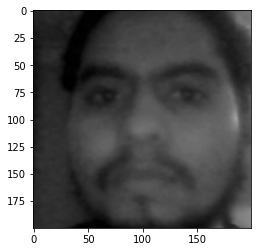

this is harris


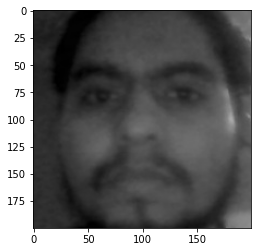

this is harris


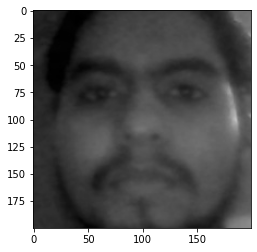

this is harris


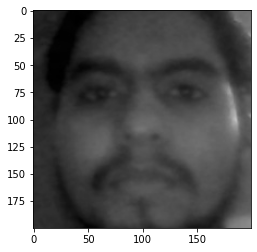

this is harris


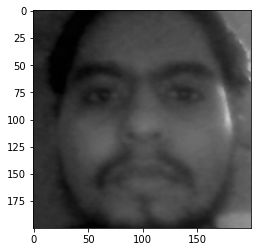

this is harris


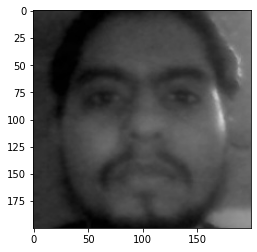

this is harris


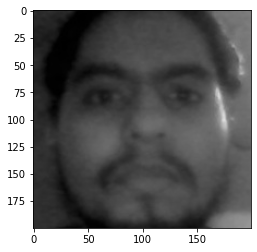

this is harris


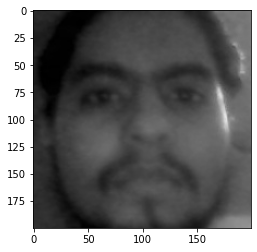

this is harris


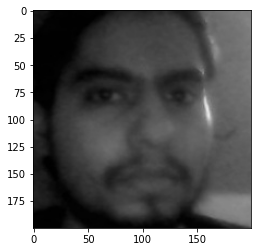

this is harris


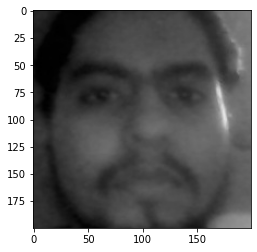

this is harris


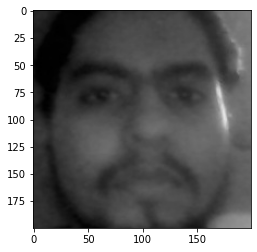

this is harris


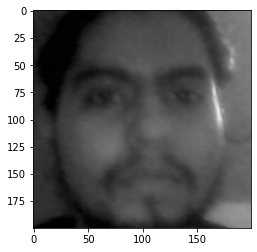

this is harris


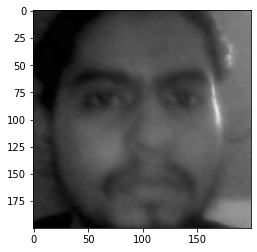

this is harris


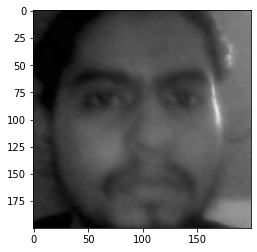

this is harris


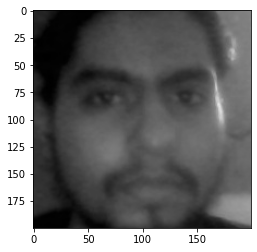

this is harris


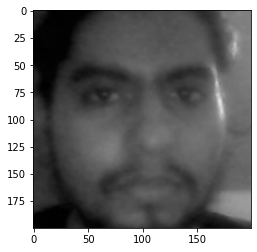

this is harris


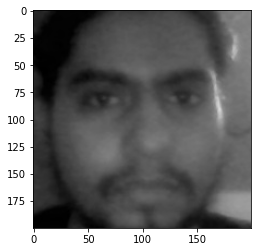

this is harris


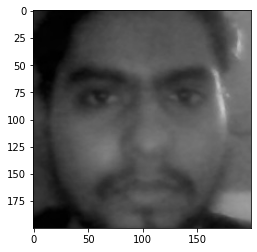

this is harris


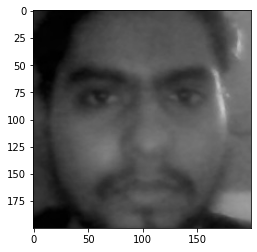

this is harris


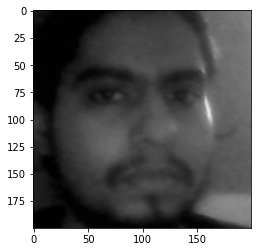

this is harris


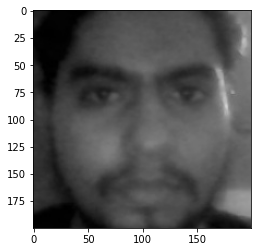

this is harris


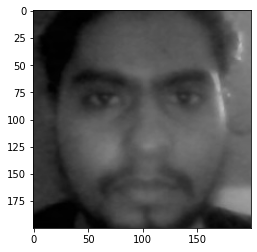

this is harris


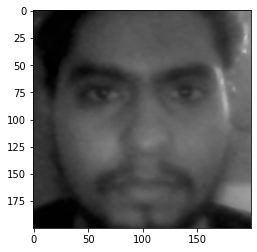

this is harris


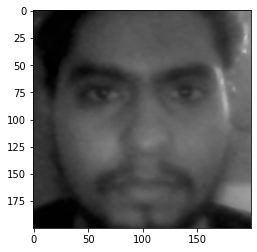

this is harris


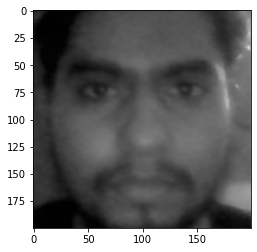

this is harris


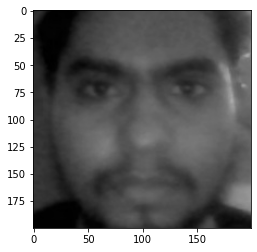

this is harris


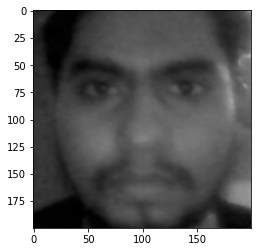

this is harris


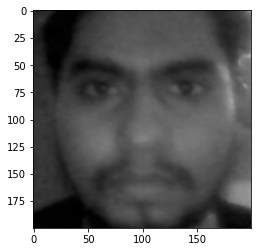

this is harris


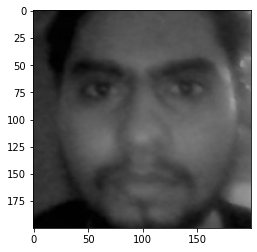

this is harris


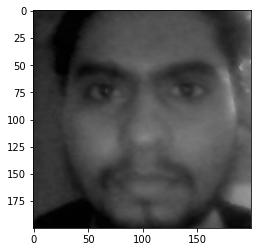

this is harris


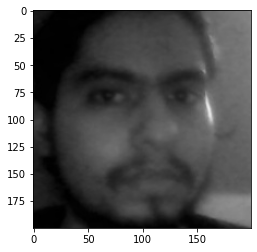

this is harris


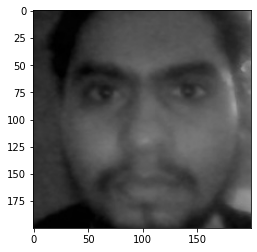

this is harris


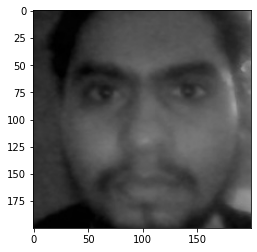

this is harris


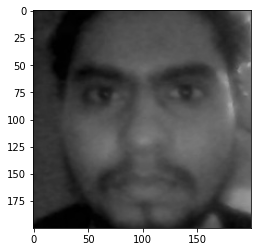

this is harris


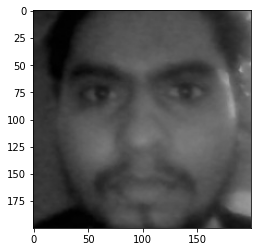

this is harris


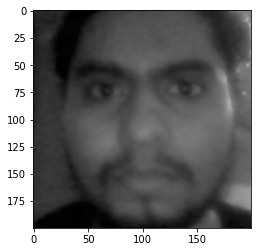

this is harris


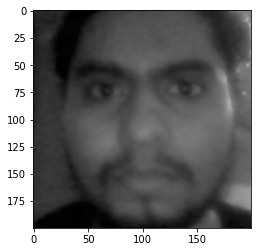

this is harris


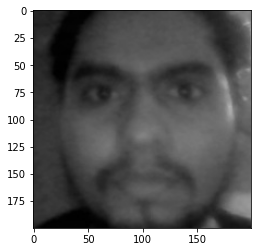

this is harris


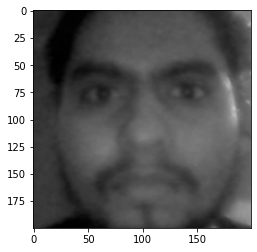

this is harris


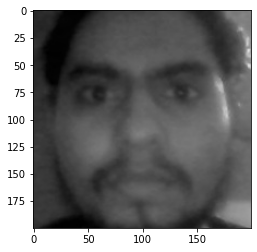

this is harris


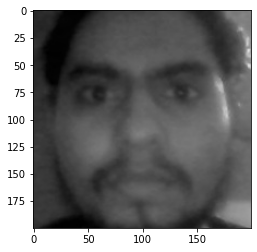

this is harris


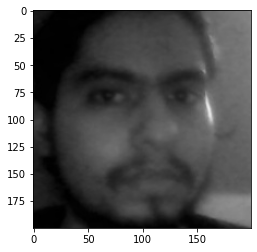

this is harris


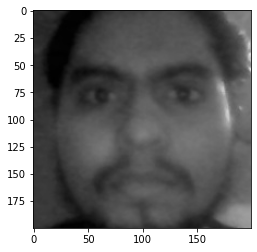

this is harris


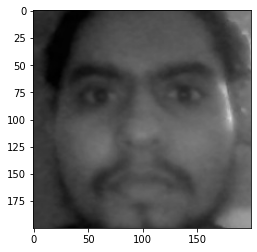

this is harris


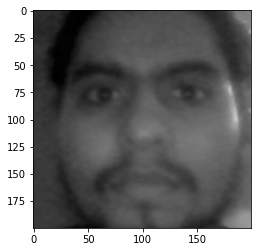

this is harris


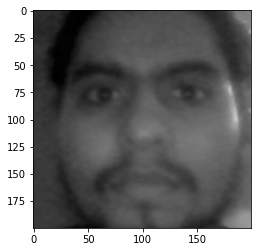

this is harris


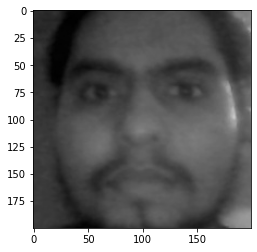

this is harris


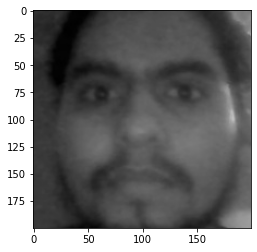

this is harris


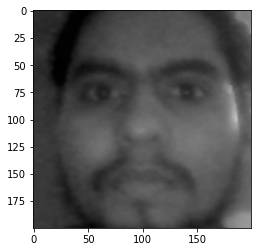

this is harris


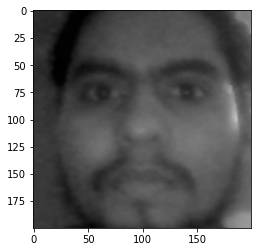

this is harris


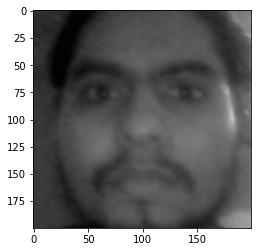

this is harris


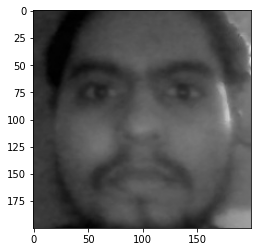

this is harris


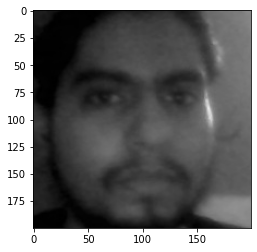

this is harris


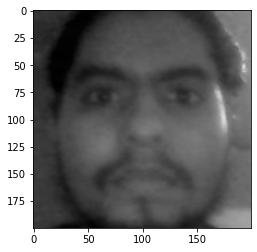

this is harris


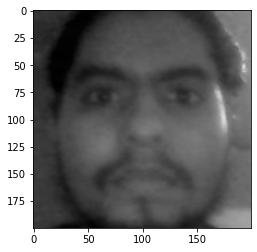

this is harris


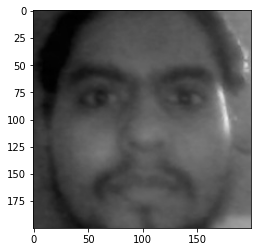

this is harris


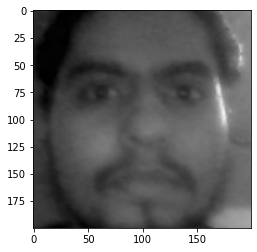

this is harris


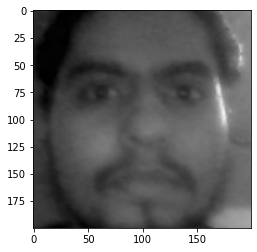

this is harris


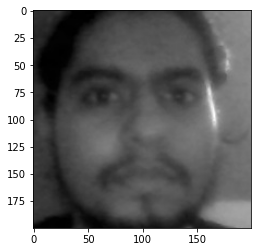

this is harris


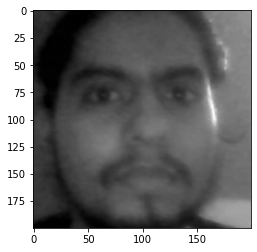

this is harris


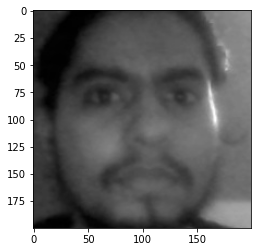

this is harris


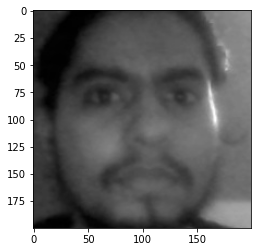

this is harris


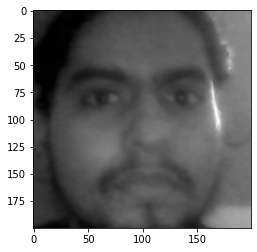

this is harris


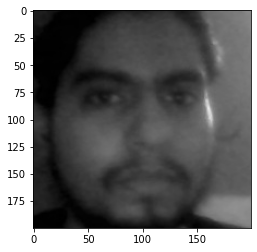

this is harris


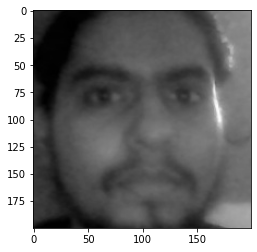

this is harris


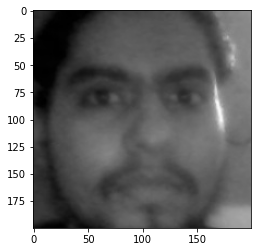

this is harris


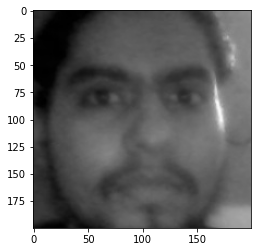

this is harris


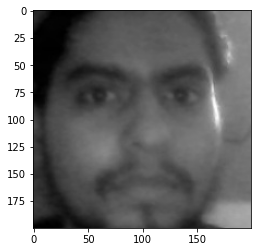

this is harris


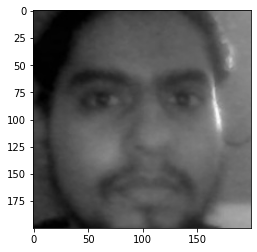

this is harris


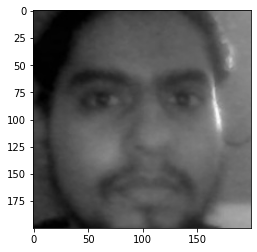

this is harris


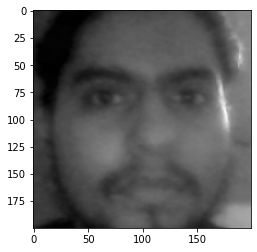

this is harris


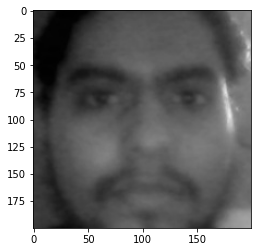

this is harris


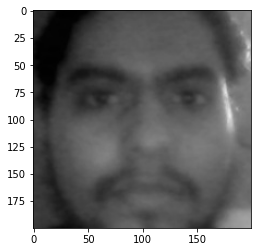

this is harris


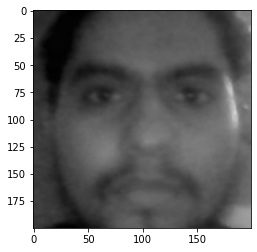

this is harris


In [44]:
for i in os.listdir("tdata"):
        img = image.load_img("tdata" + "//" + i)
        path=os.path.join("tdata",i)
        img_data = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
        img_data = cv2.resize(img_data, (50,50))
        data1 = np.array(img_data).reshape(-1,50,50,1)
        plt.imshow(img)
        
        plt.show()
        u = model.predict([data1])
        if np.argmax(u) == 0:
            print("this is rehman")
        elif np.argmax(u) == 1 :
            print("this is harris")
        else:
            print("this is anas")